### ИУ5-63Б Иванченко Максим РК1 (Вариант 6)

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.shape

(500, 9)

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
pd.concat({'Object type': data.dtypes, 'Null count': data.isnull().sum()}, axis=1)

,Object type,Null count
Serial No.,int64,0
GRE Score,int64,0
TOEFL Score,int64,0
University Rating,int64,0
SOP,float64,0
LOR,float64,0
CGPA,float64,0
Research,int64,0
Chance of Admit,float64,0


In [14]:
del data["Serial No."]
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


**Целевой признак**: Chance of Admit (шанс зачисления), принимает значения в диапазоне [0, 1]

Из матрицы корреляции видим, что целевой признак наиболее сильно коррелирует со следующими признаками (0.8 и более):
* CGPA (усредненный балл оценок в аттестате)
* GRE Score (балл за экзамен GRE)
* TOEFL Score (балл за экзамен TOEFL на знание языка)

Меньше всего на целевой признак влияет признак "Research" (наличие опыта в исследованиях), поэтому при\
создании модели можно им пренебречь в первую очередь

Теперь проверим корреляцию нецелевых признаков с помощью тепловой карты:

<Axes: >

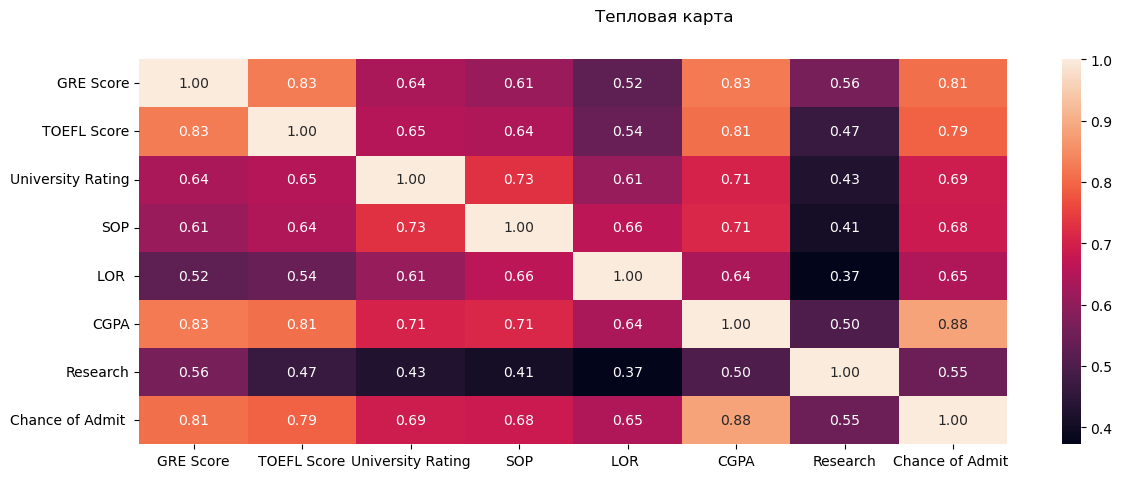

In [20]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(14,5))
fig.suptitle('Тепловая карта')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.2f')

Видим, что выбранные в предыдущем пункте признаки (CGPA, GRE Score, TOEFL Score) достаточно сильно коррелируют между собой\
Коэффициенты равны 0.81 и 0.83

Поэтому для улучшения качества модели можно попробовать убрать 1-2 признака (к примеру, TOEFL Score)

### Дополнительное задание для группы ИУ5-63Б
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Axes: ylabel='CGPA'>

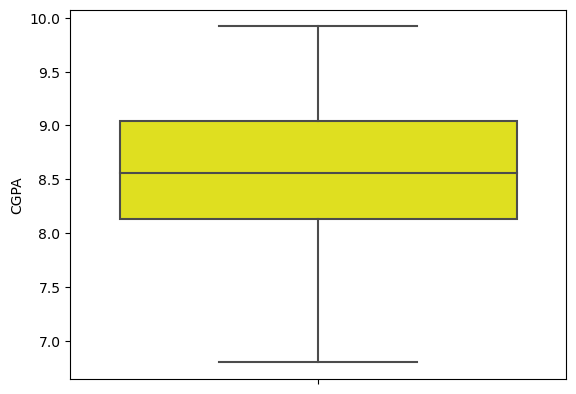

In [24]:
# Я выбрал колонку CGPA (усредненный балл оценок в аттестате)
sns.boxplot(y=data["CGPA"], color='yellow')